In [94]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from time import time
import matplotlib.ticker as tkr
from scipy import stats
%matplotlib inline

### 读取2018年的数据

In [95]:
df = pd.read_csv("data2018.csv")
print(df.head(5))

        datetime  Power(kWh)  humidity  temp
0  2018/1/1 0:00        4220     80.00  6.00
1  2018/1/1 1:00        2122     98.00  2.00
2  2018/1/1 2:00        1648     99.00  1.50
3  2018/1/1 3:00        1416     99.00  1.00
4  2018/1/1 4:00        1376     99.00  1.00


In [96]:
# df.Quality.unique()

### 将时间转换为年、月、日等

In [97]:
df['datetime']=pd.to_datetime(df['datetime']) 

df['year'] = df['datetime'].apply(lambda x: x.year)
df['quarter'] = df['datetime'].apply(lambda x: x.quarter)
df['month'] = df['datetime'].apply(lambda x: x.month)
df['day'] = df['datetime'].apply(lambda x: x.day)
df['week']=df['datetime'].dt.weekofyear
print(df.head(5))

             datetime  Power(kWh)  humidity  temp  year  quarter  month  day  \
0 2018-01-01 00:00:00        4220     80.00  6.00  2018        1      1    1   
1 2018-01-01 01:00:00        2122     98.00  2.00  2018        1      1    1   
2 2018-01-01 02:00:00        1648     99.00  1.50  2018        1      1    1   
3 2018-01-01 03:00:00        1416     99.00  1.00  2018        1      1    1   
4 2018-01-01 04:00:00        1376     99.00  1.00  2018        1      1    1   

   week  
0     1  
1     1  
2     1  
3     1  
4     1  


In [98]:
df=df.loc[:,['datetime','Power(kWh)', 'year','quarter','month','day','humidity','temp','week']]
df.sort_values('datetime', inplace=True, ascending=True)
#df = df.reset_index(drop=True)
df["weekday"]=df.apply(lambda row: row["datetime"].weekday(),axis=1)
df["weekday"] = (df["weekday"] < 5).astype(int)
print(df.shape)
print(df.datetime.min())
print(df.datetime.max())
print(df.head())

(8760, 10)
2018-01-01 00:00:00
2018-12-31 23:00:00
             datetime  Power(kWh)  year  quarter  month  day  humidity  temp  \
0 2018-01-01 00:00:00        4220  2018        1      1    1     80.00  6.00   
1 2018-01-01 01:00:00        2122  2018        1      1    1     98.00  2.00   
2 2018-01-01 02:00:00        1648  2018        1      1    1     99.00  1.50   
3 2018-01-01 03:00:00        1416  2018        1      1    1     99.00  1.00   
4 2018-01-01 04:00:00        1376  2018        1      1    1     99.00  1.00   

   week  weekday  
0     1        1  
1     1        1  
2     1        1  
3     1        1  
4     1        1  


In [99]:
#df = df.drop('datetime',1)
#print(df.tail(3))

### 数据分布测试

count   8760.00
mean    4586.88
std     2730.08
min      230.00
25%     1578.00
50%     5370.00
75%     7180.00
max     9158.00
Name: Power(kWh), dtype: float64


NormaltestResult(statistic=2.9898772064457111, pvalue=0.22426237329481333)

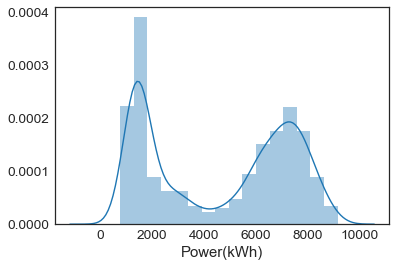

In [100]:
print(df['Power(kWh)'].describe())
sns.distplot(df['Power(kWh)'])
stats.normaltest(df['Power(kWh)'])

,count,mean,std,min,25%,50%,75%,max
Power(kWh),5880.00,4624.64,2733.38,230.00,1614.00,5392.00,7218.00,9158.00
T_1,5879.00,4625.03,2733.45,230.00,1614.00,5392.00,7218.00,9158.00
T_2,5878.00,4625.17,2733.66,230.00,1614.00,5392.00,7218.00,9158.00
T_3,5877.00,4624.90,2733.82,230.00,1614.00,5392.00,7218.00,9158.00
T_4,5876.00,4624.50,2733.88,230.00,1614.00,5392.00,7218.50,9158.00
T_5,5875.00,4624.05,2733.90,230.00,1614.00,5392.00,7218.00,9158.00
T_6,5874.00,4623.61,2733.92,230.00,1614.00,5390.00,7217.00,9158.00
T_7,5873.00,4623.18,2733.95,230.00,1614.00,5388.00,7218.00,9158.00
T_8,5872.00,4622.82,2734.04,230.00,1614.00,5387.00,7218.00,9158.00
T_9,5871.00,4622.46,2734.14,230.00,1614.00,5386.00,7218.00,9158.00


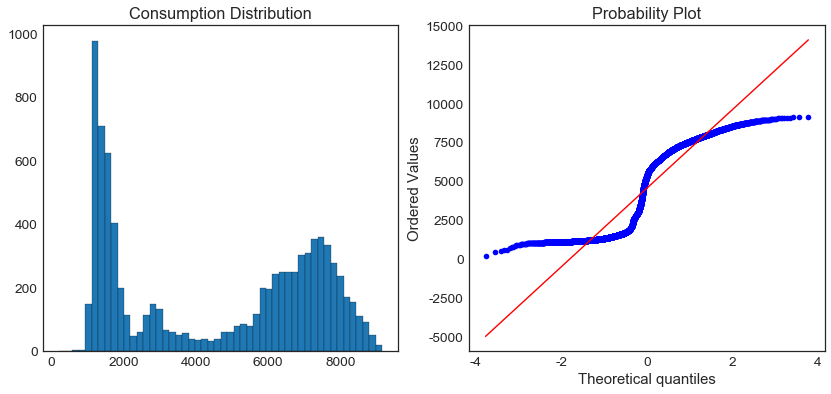

In [102]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
df['Power(kWh)'].hist(bins=50,edgecolor='black', grid=False)
plt.title('Consumption Distribution')

plt.subplot(1,2,2)
stats.probplot(df['Power(kWh)'], plot=plt);
#print("Skewness: %f" % df['Consumption'].skew())
#print("Kurtosis: %f" % df['Consumption'].kurt())
df1.describe().transpose()

### 时间数据视图

In [34]:
df1=df.loc[:,['datetime','Power(kWh)']]
#df1['Time'] = df['Time'].apply(lambda x: x.date())
#df1['Time']=pd.to_datetime(df1['Time'])
df1.set_index('datetime',inplace=True);

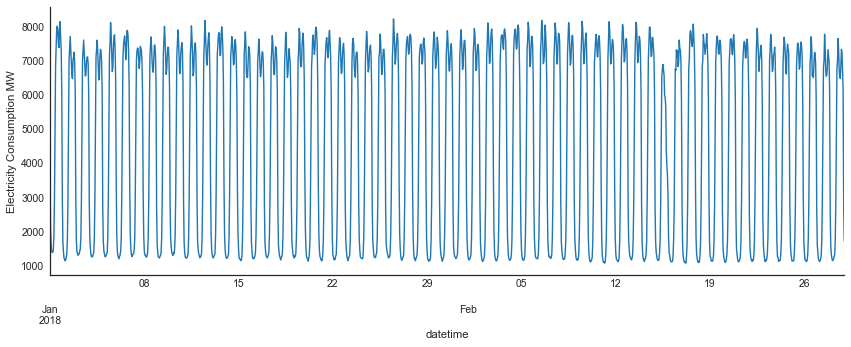

In [35]:
df2=df1[(df1.index>='2018-01-01') & (df1.index<'2018-03-01')]
#a=plt.figure(figsize=(15,6))
#sns.set_style("whitegrid", {'axes.grid' : False});
sns.set_style('white')
sns.set_context("paper", font_scale=1.3)  
#a = fig.gca()  

df2.plot(figsize=(12,5));
#plt.tick_params(left=False, labelleft=True) #remove ticks
#plt.box(False)
plt.ylabel('Electricity Consumption MW')
plt.legend().set_visible(False)
plt.tight_layout()
sns.despine(top=True)
plt.show()

### 每一个季度的能耗视图

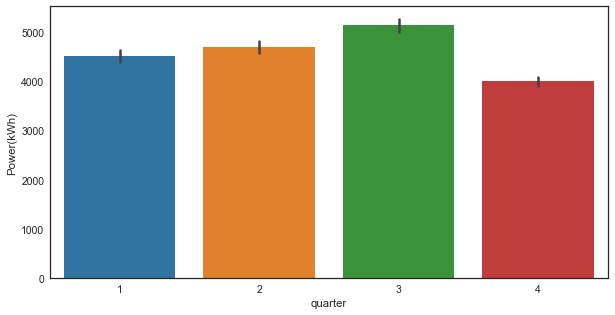

In [36]:
plt.figure(figsize=(10,5))
sns.barplot('quarter','Power(kWh)',data=df)
plt.show()

### 每一个月的能耗视图

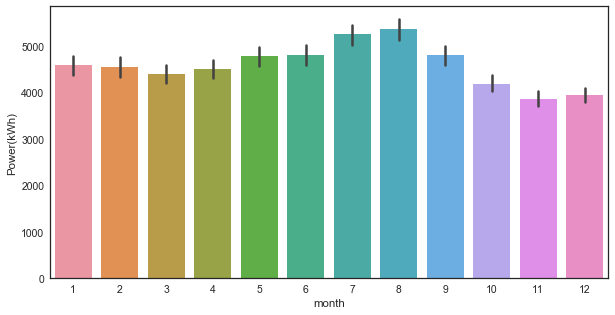

In [37]:
plt.figure(figsize=(10,5))
sns.barplot('month','Power(kWh)',data=df)
plt.show()

### 每一周的能耗视图

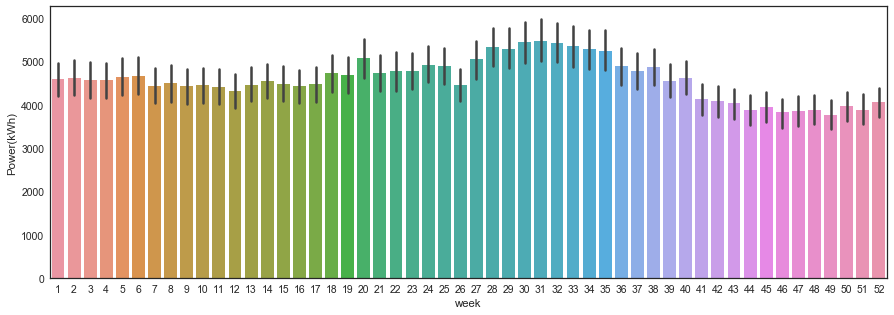

In [38]:
plt.figure(figsize=(15,5))
sns.barplot('week','Power(kWh)',data=df)
plt.show()

### 工作日与双休日的能耗视图

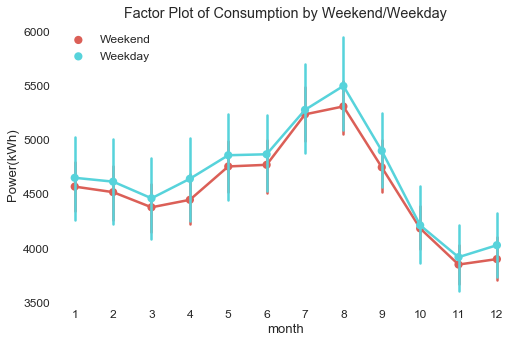

In [39]:
dic={0:'Weekday',1:'Weekend'}
df['Day'] = df.weekday.map(dic)

sns.set_context("paper", font_scale=1.5)  
plt1=sns.factorplot('month','Power(kWh)',hue='Day',
                    data=df, size=5,palette='hls', aspect=1.5, legend=False);                                                                                                                                                                                                                                                                                                                                             
plt.title('Factor Plot of Consumption by Weekend/Weekday')                                                             
plt.tight_layout()                                                                                                                  
sns.despine(left=True, bottom=True) 
plt.legend(loc='upper left');

In [40]:
df2=df1.resample('H', how=np.mean)

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=30)
    rolstd = pd.rolling_std(timeseries, window=30)

    #Plot rolling statistics:
    
    plt.figure(figsize=(14,5))
    sns.despine(left=True)
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')

    plt.legend(loc='best'); plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print ('<Results of Dickey-Fuller Test>')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4],
                         index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

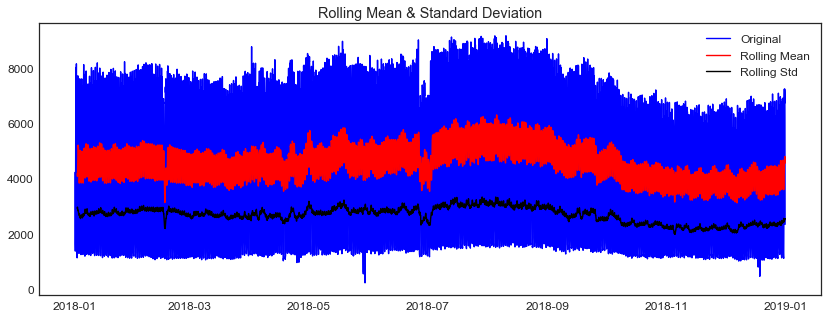

<Results of Dickey-Fuller Test>
Test Statistic                  -3.33
p-value                          0.01
#Lags Used                      37.00
Number of Observations Used   8722.00
Critical Value (1%)             -3.43
Critical Value (5%)             -2.86
Critical Value (10%)            -2.57
dtype: float64


In [41]:
test_stationarity(df2['Power(kWh)'])

### 标准化处理

In [42]:
x= df['Power(kWh)']
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler(feature_range =(0 , 1))
x = np. array (x). reshape (( len(x), ))
x=np.log (x)
print (x.shape)#x is a 1 dimensional array with 157786 rows
x=x.reshape(-1 ,1)
print (x.shape)
x = scaler.fit_transform(x)
x=x.reshape (-1)
print (x.shape)
print(round(x.min(),2))
print(round(x.max(),2))
from statsmodels.tsa.stattools import pacf
x_pacf=pacf (x,nlags=20, method='ols')
print (x_pacf)

(8760,)
(8760, 1)
(8760,)
0.0
1.0
[ 1.          0.94321136 -0.79394558  0.05930884 -0.10929111 -0.14146595
 -0.14884162 -0.23239252 -0.24215608 -0.14013569 -0.01239023 -0.07485131
 -0.30048962 -0.10478606  0.0755845   0.05986153 -0.21751712 -0.10055805
  0.17272411  0.36024472  0.43121384]


### Log Transformation 和一阶差分

In [43]:
#df2 = df1['Consumption'].resample('D').mean().to_frame()
tslog=np.log(df1)
#tslog = tslog - tslog.shift(1)
#tslog=tslog+10
tslog.dropna(inplace=True)
tslog[tslog['Power(kWh)']<0].count()

Power(kWh)    0
dtype: int64

### 迪基-福勒检验

In [44]:
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
def test_stationarity(timeseries):

    #Perform Dickey-Fuller test:
    print ('<Results of Dickey-Fuller Test>')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4],
                         index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

#df1diff.head()
tslog.dropna(inplace=True)
test_stationarity(tslog['Power(kWh)'])

<Results of Dickey-Fuller Test>
Test Statistic                  -3.41
p-value                          0.01
#Lags Used                      37.00
Number of Observations Used   8722.00
Critical Value (1%)             -3.43
Critical Value (5%)             -2.86
Critical Value (10%)            -2.57
dtype: float64


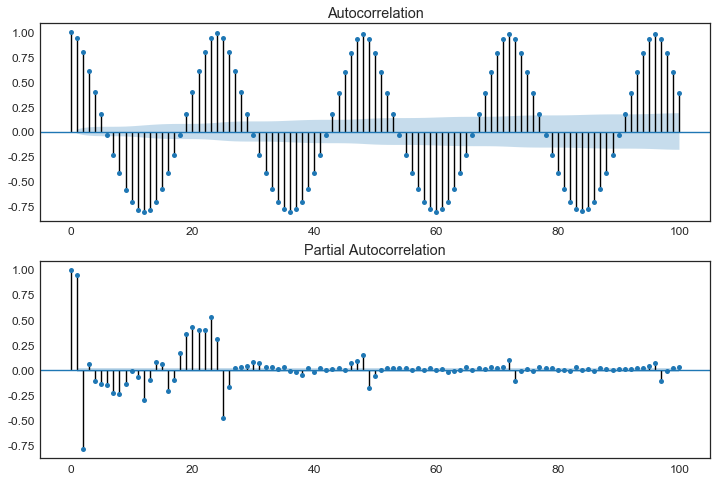

In [45]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(tslog.iloc[13:], lags=100, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(tslog.iloc[13:], lags=100, ax=ax2)

### 温湿度散点图

                     Power(kWh)  year  quarter  month  day  humidity  temp  \
datetime                                                                     
2018-01-01 00:00:00        4220  2018        1      1    1     80.00  6.00   
2018-01-01 01:00:00        2122  2018        1      1    1     98.00  2.00   
2018-01-01 02:00:00        1648  2018        1      1    1     99.00  1.50   
2018-01-01 03:00:00        1416  2018        1      1    1     99.00  1.00   
2018-01-01 04:00:00        1376  2018        1      1    1     99.00  1.00   

                     week  weekday      Day  
datetime                                     
2018-01-01 00:00:00     1        1  Weekend  
2018-01-01 01:00:00     1        1  Weekend  
2018-01-01 02:00:00     1        1  Weekend  
2018-01-01 03:00:00     1        1  Weekend  
2018-01-01 04:00:00     1        1  Weekend  


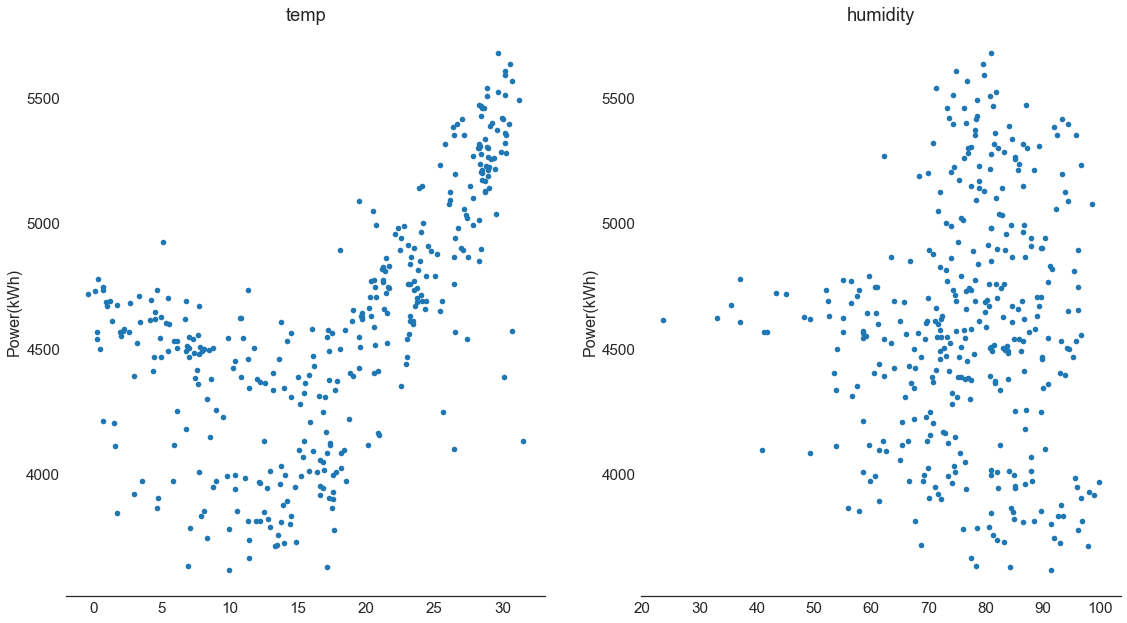

In [46]:
df['datetime']= pd.to_datetime(df['datetime'])
df.set_index('datetime',inplace=True);
print(df.head(5))
dfweek=df.resample('D', how=np.mean)
#Correlation of features with the target Price
Consumption=dfweek['Power(kWh)']
features=dfweek.loc[:,['temp','humidity']]

sns.set_style('white')
sns.set_context("paper", font_scale=1.9)  
plt.figure(figsize=(24, 9)) #Figure Size with subplots
for i, col in enumerate(features.columns):
    plt.subplot(1, 3, i+1) #Subplot of 1 row and 03 columns
    plt.plot(features[col],Consumption, 'o')
    plt.title(col)
    sns.despine(left=True)
    plt.ylabel('Power(kWh)',fontsize=16)
    plt.tight_layout()
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=None)

plt.show()

### 检查相关性

In [47]:
dfc=df[['Power(kWh)','temp','humidity']] 
for obs in range(1,10):
    dfc["T_" + str(obs)] = df['Power(kWh)'].shift(obs)
dfc.fillna(0.00,inplace=True)
dfc.head()  

,Power(kWh),temp,humidity,T_1,T_2,T_3,T_4,T_5,T_6,T_7,T_8,T_9
datetime,,,,,,,,,,,,
2018-01-01 00:00:00,4220,6.00,80.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2018-01-01 01:00:00,2122,2.00,98.00,4220.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2018-01-01 02:00:00,1648,1.50,99.00,2122.00,4220.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2018-01-01 03:00:00,1416,1.00,99.00,1648.00,2122.00,4220.00,0.00,0.00,0.00,0.00,0.00,0.00
2018-01-01 04:00:00,1376,1.00,99.00,1416.00,1648.00,2122.00,4220.00,0.00,0.00,0.00,0.00,0.00


##### 混淆矩阵

In [48]:
a=pd.DataFrame(dfc.corr())
a;

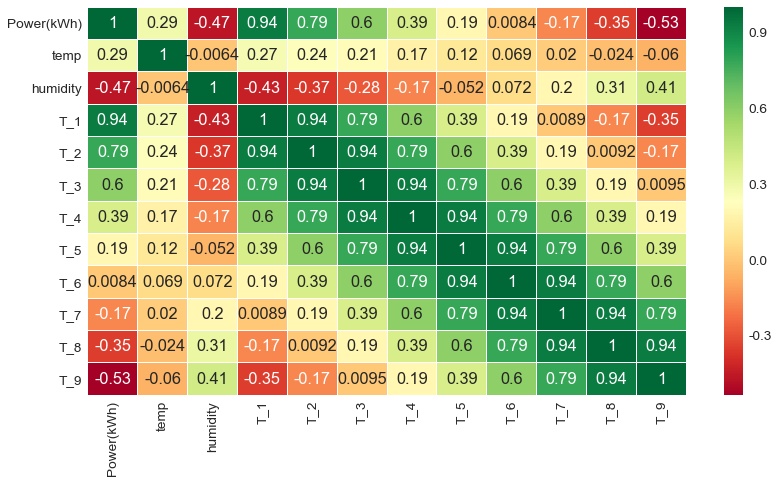

In [49]:
sns.set_style('white')
sns.set_context("paper", font_scale=1.7)  
plt.figure(figsize=(12,7))
sns.heatmap(dfc.corr(), annot=True, cmap='RdYlGn', linewidths=0.1)
plt.tight_layout()

In [50]:
from pandas import ExcelWriter
writer = ExcelWriter('LSTM.xlsx')
df.to_excel(writer,'Sheet1')
writer.save()

In [51]:
df.head(2)

,Power(kWh),year,quarter,month,day,humidity,temp,week,weekday,Day
datetime,,,,,,,,,,
2018-01-01 00:00:00,4220,2018,1,1,1,80.00,6.00,1,1,Weekend
2018-01-01 01:00:00,2122,2018,1,1,1,98.00,2.00,1,1,Weekend


##### 添加24时间滞，即前24小时的数据

In [52]:
for obs in range(1,25):
    df["T_" + str(obs)] = df['Power(kWh)'].shift(obs)
    
#df.fillna(0.00,inplace=True)
df.head(3)  

,Power(kWh),year,quarter,month,day,humidity,temp,week,weekday,Day,...,T_15,T_16,T_17,T_18,T_19,T_20,T_21,T_22,T_23,T_24
datetime,,,,,,,,,,,,,,,,,,,,,
2018-01-01 00:00:00,4220,2018,1,1,1,80.00,6.00,1,1,Weekend,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2018-01-01 01:00:00,2122,2018,1,1,1,98.00,2.00,1,1,Weekend,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2018-01-01 02:00:00,1648,2018,1,1,1,99.00,1.50,1,1,Weekend,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [53]:
dfp=df.dropna()

##### 归一化
Transforms features by caling them into range (0,1)

In [57]:

df2=df.loc[:,['Power(kWh)']]
print(df2.head(5))
#df1['Time'] = df['Time'].apply(lambda x: x.date())
#df1['Time']=pd.to_datetime(df1['Time'])
#df2.set_index('datetime',inplace=True);


                     Power(kWh)
datetime                       
2018-01-01 00:00:00        4220
2018-01-01 01:00:00        2122
2018-01-01 02:00:00        1648
2018-01-01 03:00:00        1416
2018-01-01 04:00:00        1376


In [58]:
df2.shape

(8760, 1)

In [59]:
ma = pd.rolling_mean(df2,12)
ma= ma.replace(0,np.NAN)
ma=ma.dropna(how='all',axis=0)
ma.head()

,Power(kWh)
datetime,
2018-01-01 11:00:00,3134.17
2018-01-01 12:00:00,3444.00
2018-01-01 13:00:00,3934.67
2018-01-01 14:00:00,4455.17
2018-01-01 15:00:00,4961.67


In [60]:
df2.isnull().sum()

Power(kWh)    0
dtype: int64

In [61]:
df3=df2
df3.head()

,Power(kWh)
datetime,
2018-01-01 00:00:00,4220
2018-01-01 01:00:00,2122
2018-01-01 02:00:00,1648
2018-01-01 03:00:00,1416
2018-01-01 04:00:00,1376


In [62]:
print(dfp.head(5))

                     Power(kWh)  year  quarter  month  day  humidity  temp  \
datetime                                                                     
2018-01-02 00:00:00        1406  2018        1      1    2     79.00  7.00   
2018-01-02 01:00:00        1216  2018        1      1    2     77.00  7.50   
2018-01-02 02:00:00        1192  2018        1      1    2     75.00  8.00   
2018-01-02 03:00:00        1134  2018        1      1    2     77.00  8.00   
2018-01-02 04:00:00        1168  2018        1      1    2     78.00  8.00   

                     week  weekday      Day   ...      T_15    T_16    T_17  \
datetime                                      ...                             
2018-01-02 00:00:00     1        1  Weekend   ...   4986.00 2934.00 1858.00   
2018-01-02 01:00:00     1        1  Weekend   ...   6860.00 4986.00 2934.00   
2018-01-02 02:00:00     1        1  Weekend   ...   7360.00 6860.00 4986.00   
2018-01-02 03:00:00     1        1  Weekend   ...   7938.0

In [74]:
dfp = dfp.drop('year',1)
dfp = dfp.drop('week',1)
dfp = dfp.drop('Day',1)

In [75]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(1,2))
dfp[['quarter','month','day','temp','humidity','T_1','T_2','T_3','T_4','T_5','T_6','T_7','T_8','T_9', 'T_10','T_11','T_12','T_13','T_14','T_15','T_16','T_17','T_18','T_19', 'T_20', 'T_21','T_22','T_23','T_24']] = scaler.fit_transform(dfp
                                                                                                              [['quarter','month','day','temp','humidity',
                                                                                                                'T_1','T_2','T_3','T_4','T_5','T_6','T_7','T_8','T_9', 'T_10','T_11','T_12','T_13','T_14','T_15','T_16','T_17','T_18','T_19','T_20', 'T_21','T_22','T_23','T_24']]);

In [76]:
dfp.head(2)

,Power(kWh),quarter,month,day,humidity,temp,weekday,T_1,T_2,T_3,...,T_15,T_16,T_17,T_18,T_19,T_20,T_21,T_22,T_23,T_24
datetime,,,,,,,,,,,,,,,,,,,,,
2018-01-02 00:00:00,1406,1.00,1.00,1.03,1.76,1.33,1,1.16,1.31,1.66,...,1.53,1.30,1.18,1.14,1.13,1.13,1.13,1.16,1.21,1.45
2018-01-02 01:00:00,1216,1.00,1.00,1.03,1.74,1.34,1,1.13,1.16,1.31,...,1.74,1.53,1.30,1.18,1.14,1.13,1.13,1.13,1.16,1.21


# Modeling
#数据集分割

In [77]:
dfp.index.max()

Timestamp('2018-12-31 23:00:00')

In [78]:
train_start = '2018-01-01'
train_end = '2018-11-1'
test_start = '2018-11-2'
test_end = '2018-12-31'

In [79]:
# Split up into training and testing sets (still in Pandas dataframes)

X_train = dfp[train_start:train_end]
del X_train['Power(kWh)']

y_train = dfp['Power(kWh)'][train_start:train_end]

X_test = dfp[test_start:test_end]
del X_test['Power(kWh)']

y_test = dfp['Power(kWh)'][test_start:test_end]

In [80]:
print ('Number of observations in the Training set:', len(X_train))
print ('Percentage of data in Training set:', len(X_train)/len(dfp)*100)
print ('Number of observations in the Test set: ', len(X_test))
print ('Percentage of data in Test set:', len(X_test)/len(dfp)*100)

Number of observations in the Training set: 7296
Percentage of data in Training set: 83.51648351648352
Number of observations in the Test set:  1440
Percentage of data in Test set: 16.483516483516482


In [81]:
def MAPError(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean((np.abs(y_true - y_pred)) / (y_true)) * 100

## Linear Regression 作为基准模型

In [84]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

Classifier fitted in 0.01 seconds
Score on Training data : 99.06%
Score on Testing data : 99.33%
RMSE : 184.247
MAE: 137.157343
MAPE: 4.350748


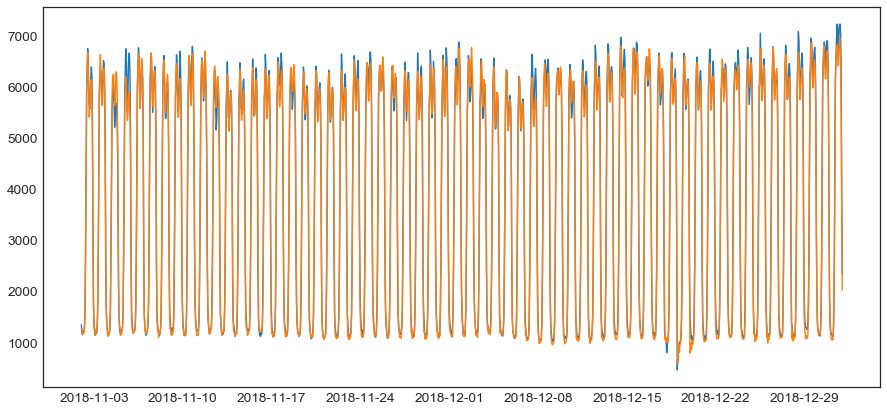

In [85]:
# Initialize and fit the model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# R^2 (coefficient of determination) regression score function
# Mean squared error regression loss

benchmark_model = LinearRegression() #object of class LinearRegression

start = time()
benchmark_model.fit(X_train, y_train) #Fit object to training set
end = time()
y_pred=benchmark_model.predict(X_test)
print("Classifier fitted in {:.2f} seconds".format(end-start))
print("Score on Training data : {:.2f}%".format(benchmark_model.score(X_train, y_train) * 100))
print("Score on Testing data : {:.2f}%".format(benchmark_model.score(X_test, y_test) * 100))

print("RMSE : {:.3f}".format(np.sqrt(np.mean((y_test - y_pred)**2))))
mae = mean_absolute_error(y_test, y_pred)
print('MAE: %f' % mae)
mape=MAPError(y_test, y_pred)
print('MAPE: %f' % mape)
fig =plt.figure(figsize=(15,7))
plt.plot(X_test.index,y_test)
plt.plot(X_test.index,y_pred)
plt.show()

In [86]:
pd.DataFrame(benchmark_model.coef_,X_train.columns,columns=['Coeff'])

,Coeff
quarter,87.59
month,-184.92
day,-2.82
humidity,-28.72
temp,147.04
weekday,-1.02
T_1,3455.72
T_2,-1244.57
T_3,378.11
T_4,-61.59


#### 特征估计

In [87]:
from sklearn import linear_model
from sklearn.feature_selection import RFE

if __name__ == "__main__":
    
    lr = linear_model.LinearRegression()

    rfe = RFE(lr, 10)
    fit = rfe.fit(X_train, y_train)
    print("Features: {features}".format(features=X_train.columns))
    print("Num Features: {number_features}".format(number_features=fit.n_features_))
    print("Selected Features: {support}".format(support=fit.support_))
    print("Feature Ranking: {ranking}".format(ranking=fit.ranking_))

    selected_columns = [column for column, selected in zip(X_train.columns, fit.support_) if selected]
    print("Selected columns: {selected}".format(selected = selected_columns))

Features: Index(['quarter', 'month', 'day', 'humidity', 'temp', 'weekday', 'T_1', 'T_2',
       'T_3', 'T_4', 'T_5', 'T_6', 'T_7', 'T_8', 'T_9', 'T_10', 'T_11', 'T_12',
       'T_13', 'T_14', 'T_15', 'T_16', 'T_17', 'T_18', 'T_19', 'T_20', 'T_21',
       'T_22', 'T_23', 'T_24'],
      dtype='object')
Num Features: 10
Selected Features: [False False False False False False  True  True False False False False
 False False False  True  True  True  True  True False False False False
 False False False  True  True  True]
Feature Ranking: [13 12 20 17 11 21  1  1  6 15  7 19 18  5  8  1  1  1  1  1  2 14  9  3 10
  4 16  1  1  1]
Selected columns: ['T_1', 'T_2', 'T_10', 'T_11', 'T_12', 'T_13', 'T_14', 'T_22', 'T_23', 'T_24']


#### 传统机器学习方法
Ridge Regression
k-Nearest Neighbors
Random Forest Regressor
GradientBoostingRegresso
ExtraTreesRegressor
Neural Network

In [90]:
# Function to fit the regressor and record performance metrics
def pipeline(reg, X_train, y_train, X_test, y_test, **kwargs):
    
    # Dictionary to hold properties of Models
    reg_props = {}
    
    # Initialize and fit the regressor, and time taken
    regressor = reg(**kwargs)
    start = time()
    regressor.fit(X_train, y_train)
    end = time()
    
    # Store the metrics for the regressor
    reg_props["name"] = reg.__name__
    reg_props["train_time"] = end - start
    reg_props["train_score"] = regressor.score(X_train, y_train)
    reg_props["test_score"] = regressor.score(X_test, y_test)
    reg_props["rmse"] = np.sqrt(mean_squared_error(y_test, regressor.predict(X_test)))
    reg_props["MAE"] = mean_absolute_error(y_test, regressor.predict(X_test))
    reg_props["MAPE"] = MAPError(y_test, regressor.predict(X_test))
    
    return reg_props

In [91]:
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.neural_network import MLPRegressor

# Function to execute each algorithm through the pipeline
def execute_pipeline():
    # Create the list of algorithms
    regressors = [
        Ridge,
        KNeighborsRegressor,
        RandomForestRegressor,
        GradientBoostingRegressor,
        MLPRegressor,
        ExtraTreesRegressor,
            ]
    
    # To store the properties for each regressor
    props = []
    
    """
    Iterate thorugh the list of regressors,
    passing each thorugh the pipeline and
    storing its properites
    """ 
    for reg in regressors:
        properites = pipeline(reg, X_train, y_train, X_test, y_test)
        props.append(properites)
        
    return props

##### 评价指标：RMSE、MAE、MAPE

In [92]:
def get_properties():
    # Obtain the properties after executing the pipeline
    properties = execute_pipeline()
    
    # Extract each individual property of the Regressors
    names = [prop["name"] for prop in properties]
    train_times = [prop["train_time"] for prop in properties]
    train_scores = [prop["train_score"] for prop in properties]
    test_scores = [prop["test_score"] for prop in properties]
    rmse_vals = [prop["rmse"] for prop in properties]
    mae_vals = [prop["MAE"] for prop in properties]
    mape_vals=[prop["MAPE"] for prop in properties]
        
    # Create a DataFrame from these properties
    df = pd.DataFrame(index=names, 
                    data = {
                            "Training Times": train_times,
                            "Training Scores": train_scores,
                            "Testing Scores": test_scores,
                            "RMSE": rmse_vals,
                            "MAE":mae_vals,
                            "MAPE":mape_vals
                      }
                  )
    
    return df

# Obain the properties in a structured DataFrame after executing the pipeline
properties = get_properties()

In [93]:
# Append the peoperties of Linear Rgression Benchmark model to the DataFrame
# Storing the properties of Selected models

properties = pd.concat(
    [properties,
    pd.Series(
    {
        "Name": "Linear Regression (Benchmark)",
        "RMSE": np.sqrt(mean_squared_error(y_test, benchmark_model.predict(X_test))),
        "MAE": mean_absolute_error(y_test, benchmark_model.predict(X_test)),
        "MAPE": MAPError(y_test, benchmark_model.predict(X_test)),
        "Training Scores": benchmark_model.score(X_train, y_train),
        "Testing Scores" :benchmark_model.score(X_test, y_test),
        "Training Times": end - start
        
    }
    ).to_frame().T.set_index(["Name"])]
)

properties

,MAE,MAPE,RMSE,Testing Scores,Training Scores,Training Times
Ridge,138.13,4.32,186.35,0.99,0.99,0.24
KNeighborsRegressor,232.18,6.60,317.99,0.98,1.00,0.02
RandomForestRegressor,152.86,4.24,230.41,0.99,1.00,1.24
GradientBoostingRegressor,148.50,4.51,219.21,0.99,0.99,1.24
MLPRegressor,745.65,32.28,862.05,0.85,0.90,4.58
ExtraTreesRegressor,131.25,3.94,191.72,0.99,1.00,0.51
Linear Regression (Benchmark),137.16,4.35,184.25,0.99,0.99,0.01
